In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version:  0.0.18


In [3]:
from lmfit import *

In [4]:
data=pd.read_csv('data/RU_Crichton.csv')
data.head()

,Unnamed: 0,U,R
0,0,0.024952,-0.019249
1,1,-0.001723,0.022408
2,2,0.018616,0.022408
3,3,0.012132,0.022408
4,4,0.037361,0.022408


(-0.2, 0.2)

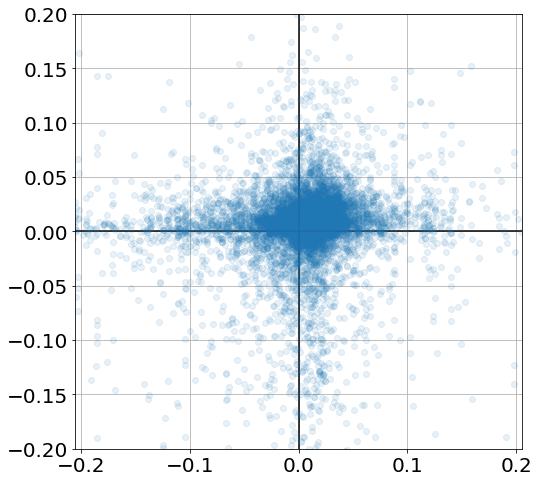

In [11]:
figure(figsize=(8,8))
x=data['R']
y=data['U']
plot([-.6,.6],[0,0],'k-')
plot([0,0],[-.6,.6],'k-')
plot(x,y,'o',alpha=0.1)
axis('equal')
xlim([-.2,.2])
ylim([-.2,.2])

definitely a global warming bias, but lots of examples of Crichton to cherry pick.

## HIV Data

In [14]:
data=pd.read_csv('data/HIVseries.csv',header=None)
data.head()

,0,1
0,0.0000,106100.0
1,0.0831,93240.0
2,0.1465,166720.0
3,0.2587,153780.0
4,0.4828,118800.0


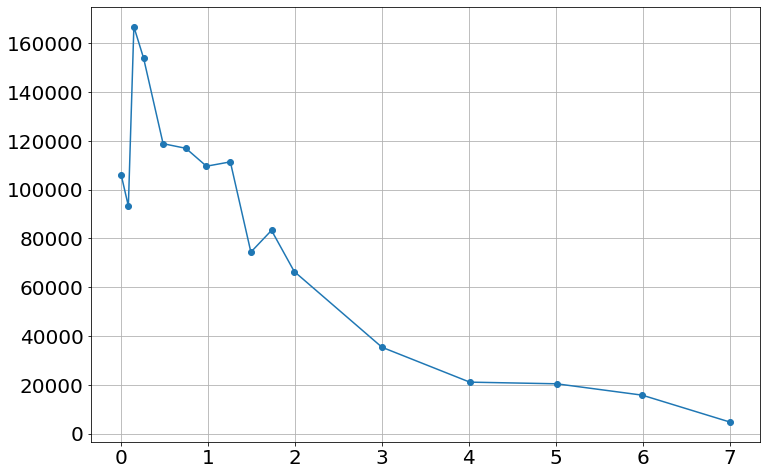

In [15]:
t_data=data[0]
V_data=data[1]
plot(t_data,V_data,'o-')

In [22]:
t_data

0     0.0000
1     0.0831
2     0.1465
3     0.2587
4     0.4828
5     0.7448
6     0.9817
7     1.2563
8     1.4926
9     1.7299
10    1.9915
11    3.0011
12    4.0109
13    5.0090
14    5.9943
15    7.0028
Name: 0, dtype: float64

In [16]:
def double_exponential(t,A=1,B=1,α=1,β=1):
    return A*exp(-α*t)+B*exp(-β*t)

In [17]:
mymodel=Model(double_exponential)   # from lmfit

In [23]:
params=mymodel.make_params()
params['A']=Parameter("A",min=0,value=1)
params['B']=Parameter("B",min=0,value=1)
params['α']=Parameter("α",min=0,value=1)
params['β']=Parameter("β",min=0,value=1)
params

name,value,initial value,min,max,vary
A,1.00000000,1,0.00000000,inf,True
B,1.00000000,1,0.00000000,inf,True
α,1.00000000,1,0.00000000,inf,True
β,1.00000000,1,0.00000000,inf,True


In [24]:
result = mymodel.fit(V_data, params, t=t_data)
result

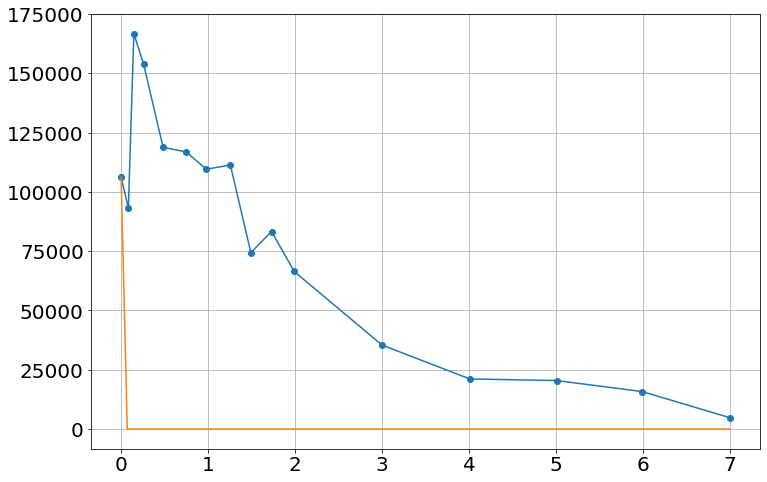

In [25]:

tt=linspace(0,7,100)
VV=result.eval(t=tt)

plot(t_data,V_data,'o-')
plot(tt,VV)


Can't blindly fit -- need to do a parameter search

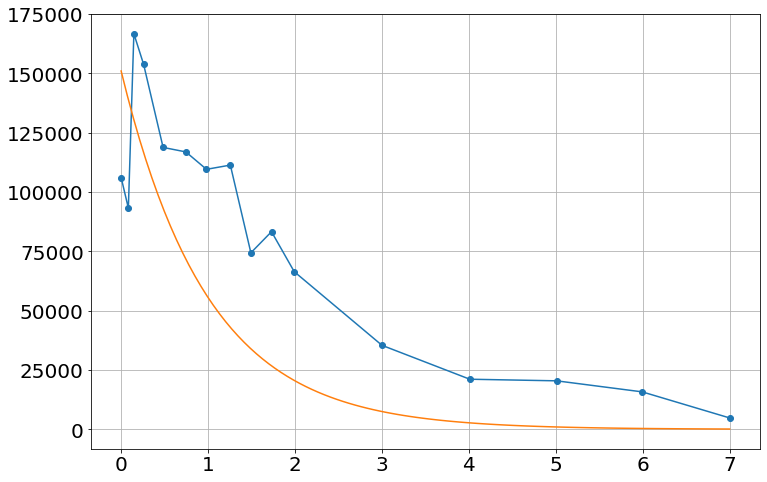

In [26]:
tt=linspace(0,7,100)
VV=double_exponential(tt,A=150000,B=1000,α=1,β=1)

plot(t_data,V_data,'o-')
plot(tt,VV)




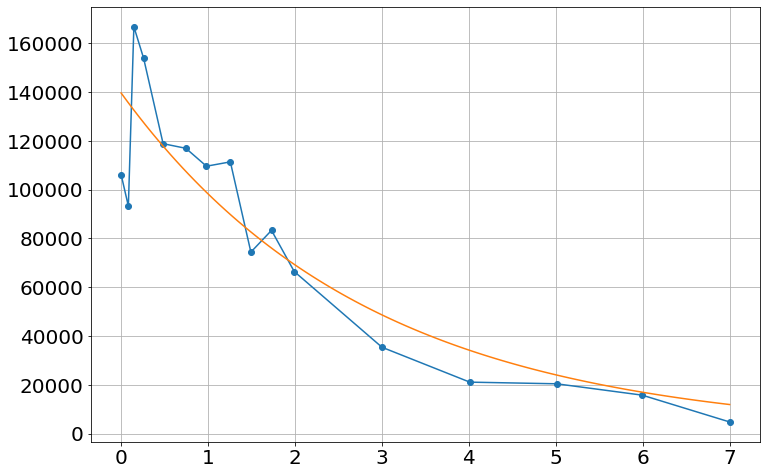

In [27]:
params['A']=Parameter("A",min=0,value=150000)
params['B']=Parameter("B",min=0,value=1000)
params['α']=Parameter("α",min=0,value=1)
params['β']=Parameter("β",min=0,value=1)
result = mymodel.fit(V_data, params, t=t_data)

tt=linspace(0,7,100)
VV=result.eval(t=tt)

plot(t_data,V_data,'o-')
plot(tt,VV)


In [28]:
result